# Post-Ride Survey Analysis

## EDA

In [27]:
import pandas as pd
import numpy as np

In [28]:
data = pd.read_csv('postridecsv.csv')

In [29]:
data.head()
# no NAs

,Timestamp,Intervention,Use?,Name,Feedback #1,Feedback #2,Feedback #3,Feedback #4,Feedback #5,Feedback #6,...,Please rate your overall experience of riding the autonomous vehicle,It operated as expected,It seems trustworthy,It was comforting,It will drive more safely than other human drivers,It is recommendable to others,How comfortable were you in the autonomous vehicle,How friendly did you feel the autonomous vehicle was?,How safe did you feel in the autonomous vehicle?,How likely are you to ride an autonomous vehicle again?
0,"Tuesday, July 17, 2018",Julie,YES,Babak,1,1,1,0,0,0,...,7,4,3,3,3,4,7,7,5,7
1,"Thursday, July 19, 2018",Lily,Maybe; Semi-autonomous,Chris,1,0,0,0,0,0,...,8,2,3,2,3,3,7,7,10,10
2,"Monday, July 23, 2018",Julie,"Maybe--Wondered if she was being ""punked""; Sem...",Kristin,1,0,1,0,1,1,...,7,4,0,0,3,4,7,7,6,8
3,"Friday, July 27, 2018",Lily,YES,Danny,1,1,1,1,1,1,...,10,4,4,4,3,4,10,10,5,10
4,"Monday, July 30, 2018",Julie,NO; knew this was not an AV and filled out the...,Aaron,1,-1,1,1,1,1,...,7,2,3,3,3,3,8,7,5,7


### Take out those who were aware of survey subtleties

In [30]:
data = data[~data["Use?"].str.startswith("N")]
data = data[~data["Use?"].str.startswith("S")]
data.shape

(24, 21)

### Feedback scores

In [99]:
temp = data.drop(data.columns[11:], axis = 1)
feedback = temp.drop(temp.columns[[0,2,3]], axis = 1)

In [100]:
feedback_by_Intervention = feedback.groupby("Intervention").sum()
feedback_by_Intervention

,Feedback #1,Feedback #2,Feedback #3,Feedback #4,Feedback #5,Feedback #6,Feedback #7
Intervention,,,,,,,
Julie,11,7,10,8,7,10,7
Lily,10,5,4,7,6,9,6


In [101]:
feedback_sum = feedback.assign(SumFeedback = feedback[feedback.columns[1:8]].sum(axis = 1))
#data2 = data2.assign(Conf_Score = data2[list(data2)[7:10]].sum(axis = 1))

### Can We Plot the Feedback Scores?

In [122]:
import matplotlib.pyplot as plt

In [158]:
feedback_by_Intervention

,Feedback #1,Feedback #2,Feedback #3,Feedback #4,Feedback #5,Feedback #6,Feedback #7
Intervention,,,,,,,
Julie,11,7,10,8,7,10,7
Lily,10,5,4,7,6,9,6


In [155]:
temp = feedback_by_Intervention.T

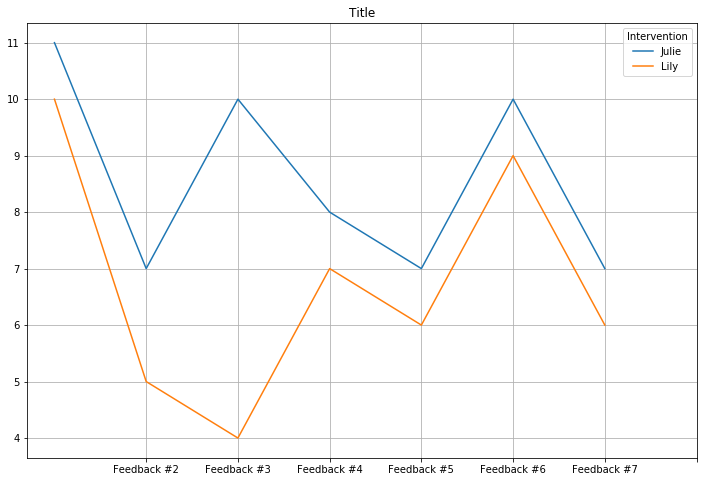

In [156]:
temp.plot(figsize = [12,8], grid = True, use_index = True, xticks = np.arange(1, 8, 1), title = "Title")

Need to improve the plot, but this shows how Julie is higher at each position where the users were asked for a 'Feedback' score. 

## Mann-Whitney U Test

In [74]:
import scipy
from scipy import stats

### Feedback Score Totals

In [159]:
print("Sum of Feedback scores")
x = feedback_sum[feedback_sum["Intervention"]=="Julie"]["SumFeedback"]
y = feedback_sum[feedback_sum["Intervention"]=="Lily"]["SumFeedback"]
scipy.stats.mannwhitneyu(x,y, alternative = 'two-sided')

Sum of Feedback scores


MannwhitneyuResult(statistic=90.0, pvalue=0.305386896556222)

No significant difference for the combined Feedback score. 

### Overall Experience of Riding in the Autonomous Vehicle

In [92]:
print("Overall Experience of Riding the Autonomous Vehicle")
x = data[data["Intervention"]=="Julie"]["Please rate your overall experience of riding the autonomous vehicle"]
y = data[data["Intervention"]=="Lily"]["Please rate your overall experience of riding the autonomous vehicle"]
scipy.stats.mannwhitneyu(x,y, alternative = 'two-sided')

Overall Experience of Riding the Autonomous Vehicle


MannwhitneyuResult(statistic=68.0, pvalue=0.8361643332711484)

### How likely are you to ride an autonomous vehicle again?

In [93]:
print("How likely are you to ride an autonomous vehicle again?")
x = data[data["Intervention"]=="Julie"]["How likely are you to ride an autonomous vehicle again? "]
y = data[data["Intervention"]=="Lily"]["How likely are you to ride an autonomous vehicle again? "]
scipy.stats.mannwhitneyu(x,y, alternative = 'two-sided')

How likely are you to ride an autonomous vehicle again?


MannwhitneyuResult(statistic=50.0, pvalue=0.18835623958464986)

None of these test results came out as statistically significant. 